In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_w(ins, outs):
  res = np.zeros((100, 100))
  for i, v in enumerate(ins):
    res += np.matmul(v.flatten()[np.newaxis].T ,outs[i].flatten().reshape(1, -1))
  return res

In [3]:
def sign(inp):
  res = []

  for i in inp[0]:
    if i >= 0:
      res.append(1)
    else:
      res.append(-1)

  return np.array(res)

In [4]:
def add_noise(inp, p):
  ids = np.random.choice(len(inp[0]), int(len(inp[0])*p)+1)
  inp_c = inp.copy()
  for i in ids:
    inp_c[0][i] += float((-2*inp_c[0][i])/np.abs(inp_c[0][i]))
  return inp_c

In [5]:
ns = [100]
rs = [10,20,30,40,50,60,70,80,90,100]
es = [0, 0.2, 0.4]

runs = 30

res = {0: [], 0.2: [], 0.4: []}

for N in ns:
  for E in es:
    for R in rs:
      accs = []
      for run in range(runs):
        ins = [(2*np.random.randint(2, size=N)-1).reshape(1,-1) for i in range(R)]
        ins = np.array(ins)

        w = gen_w(ins, ins)

        np.fill_diagonal(w, 0)

        acc = 0
        for i in range(R):
          pred = sign(np.matmul(add_noise(ins[0], E), w)).reshape(1, -1)
          acc += np.sum(pred == ins[0])/(R*100)
        accs.append(acc)
      res[E].append(np.mean(accs))

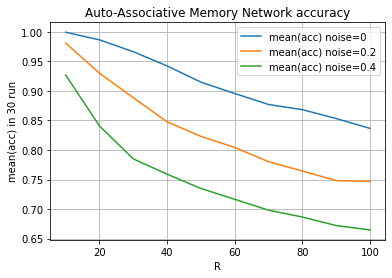

In [6]:
plt.plot(rs, res[0], label='mean(acc) noise=0')
plt.plot(rs, res[0.2], label='mean(acc) noise=0.2')
plt.plot(rs, res[0.4], label='mean(acc) noise=0.4')
plt.xlabel('R')
plt.ylabel('mean(acc) in 30 run')
plt.title('Auto-Associative Memory Network accuracy')
plt.grid()
plt.legend()
plt.show()